# Iris 품종 분류
- 지도학습
- scikit-learn 활용 : 예제 데이터셋, 내장 분류 모델 학습
- Decision Tree, XGBoost, RandomForest, Logistic Regression 학습

## 사이킷런 내장 데이터

### Toy Dataset
적은 양의 데이터, 외부 웹사이트에서 따로 다운로드를 받지 않아도 되는 데이터
- boston : 보스턴 부동산 가격 데이터셋 (regression)
- iris : 붓꽃 데이터 (classification)
- diabetes : 당뇨병 데이터 (regression)
- linnerud : linnerud 데이터 (multi-regression)
- wine : 와인 데이터 (classification)
- breast_cancer : 유방암 데이터 (classification)

### Real World Dataset
데이터의 양이 더 많고, 필요하다면 다운로드를 받아야 하는 데이터
- olivetti_faces : Olivetti faces 데이터셋 from at&t (classification)
- 20newsgroups : 20개의 뉴스 데이터셋 (classification)
- 20newsgroups_vectorized : 뉴스데이터들을 벡터화 시킨 데이터셋 (classification)
- lfw_people : wild people 데이터셋 (classification_recognition)
- lfw_pairs : 위의 데이터셋이 페어로 들어가있다. (classification_recognition)
- california_housing : 캘리포니아 부동산 데이터셋(regression)

## 1. 데이터셋 로드

In [17]:
from sklearn.datasets import load_iris

iris = load_iris()

print(type(dir(iris))) 
# dir()는 객체가 어떤 변수와 메서드를 가지고 있는지 나열함

<class 'list'>


In [2]:
# data : 데이터
# target : 데이터에 대한 label값 / target_names : label값이 무엇을 나타내는 지
# DESCR : 데이터셋의 설명
# feature_names : 각 features에 대한 설명
# filename : 파일이 저장되어 있는 경로
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
# data, target, ... , filename 까지 위에 있는 키 중에서 data를 저장시킨다
iris_data = iris.data
print(iris_data.shape)

(150, 4)


In [4]:
# sepal length, sepal width, petal length, petal width
iris_data[0]

array([5.1, 3.5, 1.4, 0.2])

In [5]:
# target을 정답 라벨에 저장
iris_label = iris.target
print(iris_label.shape)
iris_label

(150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
# 위에서 target값을 idx로 접근해서 이름을 알 수 있다.
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# 2. 데이터 만들기

## Pandas를 활용
- csv데이터를 읽어서 데이터를 만든다

In [8]:
import pandas as pd

# data에는 iris_data값을 넣어주고, 각 컬럼에는 faeture_names를 넣어준다.
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
# label칼럼도 추가
iris_df["label"] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 데이터셋 분류
- scikit-learn의 ```train_test_split``` 활용
- ```test_size``` 인자로 ```0.2```를 전달 : 8:2의 비율로 train, test를 나눔
- ```random_state``` : ```train```데이터와 ```test```데이터를 분리하는데 적용되는 랜덤성을 결정
 - 기존의 데이터라면 라벨이 0부터 순서대로 정렬되어 있던 것을 랜덤하게 섞는 과정이 필요
 - 혹은 ```random_seed```


In [10]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))

X_train 개수:  120 , X_test 개수:  30


In [12]:
# 나눈 데이터 확인
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((120, 4), (120,), (30, 4), (30,))

In [13]:
# 랜덤하게 섞인 라벨 확인
y_train, y_test

(array([2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2, 1, 2, 2, 1, 0, 1, 1, 2, 0, 0, 0,
        2, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 0,
        1, 2, 1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 2, 0, 2, 2, 1, 0, 1, 0, 2, 2,
        0, 0, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 0, 2, 0, 0, 1,
        1, 2, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 2,
        0, 2, 1, 1, 0, 2, 1, 2, 1, 0]),
 array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
        1, 2, 2, 2, 1, 1, 2, 2]))

### 진행하기 전에 잠깐
붓꽃 품종 판별문제는?
1. 지도 학습이다
 - 붓꽃에 대한 데이터(꽃받침, 꽃잎)와 그 데이터에 대한 정답(label)이 주어지기 때문에
2. 분류 학습이다. (Classification)
 - 입력 데이터가 어떠한 카테고리에 속하는지 맞추는 문제

### 분류 모델 _ 1. Decision Tree

#### Decision tree 모델
- root에서 부터 분기가 거듭할수록 해당하는 데이터는 줄어든다.
- terminal 노드(제일 끝에 있는 노드)의 데이터들을 다 합치면 root 노드의 데이터수와 일치한다.
 - terminal 노드들 간의 교집합은 없다는 의미와도 같음.
 
  
- **분류**와 **회귀**도 모두 가능
 - 분류(classification)과정 : **최빈값**
   - 새로운 데이터가 특정 terminal 노드에 속한다는 정보를 확인한 뒤 해당 terminal node에서 가장 빈도가 높은 범주에 새로운 데이터를 분류하게 된다.
 - 회귀(regression)과정 : **평균**
   - 회귀의 경우 terminal 노드의 종족변수(y)의 평균을 예측값으로 반환
   - 이 때 예측값의 종류는 terminal 노드 개수와 일치
  
- 데이터를 분리할 어떤 경계를 찾아내어 데이터를 체에 거르듯 한 단계씩 분류해나가는 모델

#### 순도(데이터가 균일한 정도)를 나타내는 3가지 지표
의사 결정 나무는 한번 분기때 변수 영역을 두개로 구분한다. 
이때 구분하고나서 <u>순도(homogeneity)의 증가, 불순도(impurity) 혹은  불확실성(uncertainty)가 최대한 감소</u>하는 방향으로 학습을 진행
- 엔트로피
 - 확률이 낮을수록, 어떤 정보일지는 불확실하게 되고, 우리는 이때 ‘정보가 많다’, ‘엔트로피가 높다’고 표현한다. ([위키](https://ko.wikipedia.org/wiki/%EC%A0%95%EB%B3%B4_%EC%97%94%ED%8A%B8%EB%A1%9C%ED%94%BC))
 - 순도와 관련하자면 불확실성의 최소, 순도의 최대일때 엔트로피는 0에 가까워진다.
- 정보량
- 지니불순도, 지니계수 (엔트로피 외에 많이 쓰이는 불순도 지표)
 - [지니계수_통계청](http://kostat.go.kr/incomeNcpi/income/income_dg/4/1/index.static)
 - [지니불순도](https://smalldataguru.com/%EA%B2%B0%EC%A0%95-%ED%8A%B8%EB%A6%ACdecision-tree%EC%9D%98-%EC%A7%80%EB%8B%88-%EB%B6%88%EC%88%9C%EB%8F%84gini-impurity%EB%9E%80-%EB%AC%B4%EC%97%87%EC%9D%BC%EA%B9%8C/) 그림을 통해서 지니 불순도가 무엇인지 보기 편하게 정리되어 있다.

#### 정리
- Decision Tree는 계산복잡성대비 높은 예측 성능을 낸다 + 변수 단위로 설명력을 지닌다
- **결정경계(decision boundary)**가 데이터 축에 수직이어서 특정 데이터에만 잘 작동할 가능성이 높다. : overfitting이 되기 쉽다
 - 이러한 문제를 해결하기 위해 <font color='red'>랜덤포레스트</font>이다.
 - 여러개의 Decision Tree를 만들어서 그 결과를 종합해서 예측하는 방법 : **앙상블 모델**
 
#### 참고
- https://ratsgo.github.io/machine%20learning/2017/03/26/tree/
- https://niceguy1575.tistory.com/95

# 3. 모델 학습 및 예측

## 모델 import
- ```sklearn.tree```에 있는 ```DecisionTreeClassifier``` import 시킨다.

In [14]:
# Decision Tree를 import 해서 가져온다
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
print(decision_tree._estimator_type)

classifier


## 모델 학습
- ```fit``` : training dataset에 맞게 모델을 <font color='red'><b>fitting</b></font>, <font color='red'><b>맞추는 것</b></font>이라고 할 수 있다.
- 그러므로 dataset에 존재하지 않는 데이터에 대해서는 정확한 정답 카테고리가 무엇인지 알지 못한다. -> 다만 어떤 카테고리에 속할지 예측할 뿐
 - 그렇기 때문에 다양한 정보가 있는 데이터셋을 학습킨다면 좀더 다양한 카테고리를 분류할 수 있다.

In [15]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=32)

## 모델 평가
- 위에서 학습시킨 모델을 통해서 ```predict``` 메소드를 통해 앞에서 나눈 ```X_test```, test 데이터로 예측을 한다.
- 예측값을 ```y_pred```에 저장 후, 앞에서 나눴던 ```y_test```,  test 데이터의 label값과 비교해본다
 - 정확도를 구하는 방법은 ```sklearn.metrics```에 있는 ```accuracy_score```를 활용

In [18]:
y_pred = decision_tree.predict(X_test)
y_pred

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2])

In [19]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9

# 코드 정리

In [22]:
# (1) 필요한 모듈 import
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# (2) 데이터 준비
iris = load_iris()
iris_data = iris.data
iris_label = iris.target

# (3) train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

# (4) 모델 학습 및 예측
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.91      0.83      0.87        12
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



# 모델을 바꿔본다.
- Decision Tree의 단점을 보완한 <b>RandomForest</b>를 사용
- ```sklearn.ensemble```의 ```RandomForestClassifier```

#### RandomForest
- 여러 개의 Decision Tree를 사용한다
- 다수결의 원칙과 비슷하게 1000개의 의사 결정 트리 중 678개의 트리가 'a' 라는 의견을 낸다면 그러한 의견들을 종합하게 된다.
- 앙상블 기법 : 여러 개의 모델 결과를 합치는 방법(여러 개의 Decision Tree)
- Random?
 - 의사를 결정하는 요소를 랜덤하게 선정
 - 매 단계마다 이렇게 랜덤하게 요소를 뽑아서 새로운 단계를 생성하면서 학습
 - <b>왜 그러는가?</b>
   - <font color='red'>모든 요소를 고려하기 위해서</font>
   - 아무리 5~6개의 요소가 똑똑하더라도 나머지 요소들을 고려하는 것이 목적
 
 (참고 : https://medium.com/@deepvalidation/title-3b0e263605de)

In [23]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=25)

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      0.92      0.92        13
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



### 다른 모델 학습

#### SVM

In [27]:
from sklearn import svm
svm_model = svm.SVC()

print(svm_model._estimator_type)

classifier


In [29]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=25)

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        13
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



#### Stochastic Gradient Descent Classifier (SGDClassifier)
[참고](http://shuuki4.github.io/deep%20learning/2016/05/20/Gradient-Descent-Algorithm-Overview.html)

In [31]:
from sklearn.linear_model import SGDClassifier

X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=25)

sgd_model = SGDClassifier()

print(sgd_model._estimator_type)

sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

classifier
              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.86      0.92      0.89        13
           2       0.88      0.88      0.88         8

    accuracy                           0.90        30
   macro avg       0.91      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



#### Logistic Regression
[참고](http://hleecaster.com/ml-logistic-regression-concept/)

In [35]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=1000000)
#max_iter인자를 안줄 경우 에러가 발생하지만 작동은 한다.

print(logistic_model._estimator_type)

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        13
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# 평가 _ 정확도의 함정
- 모델 성능을 평가하는데에는 정확도뿐만 아니라 다양하게 있다.

## 손글씨 데이터

### 데이터 가져오기

In [38]:
# 데이터 가져오기
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

### 데이터 확인

In [51]:
# data확인
digits_data = digits.data
digits_data.shape

(1797, 64)

In [42]:
# 64개의 숫자가 있지만 원래 MNIST데이터는 8x8의 이미지 데이터이다.
digits_data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

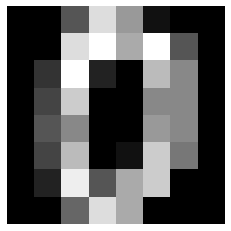

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

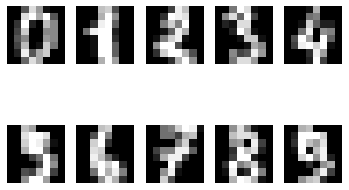

In [44]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

In [52]:
# target에는 label값이 들어가있다.
digits_label = digits.target
print(digits_label.shape)
digits_label[:20]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### 3을 기준으로 3인지, 아닌지를 맞추는 문제로 수행
- 위에서 가져온 digits_label중에서 3인 경우만 그대로 3이라고 두고 아닐 경우 0으로 변형

In [46]:
new_label = [3 if i == 3 else 0 for i in digits_label]
new_label[:20]

[0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0]

- Decision Tree로 문제를 해결해 본다
 1. ```train_test_split``` 으로 데이터 만들기
 2. model fit 시키기
 3. predict로 예측 및 결과 저장
 4. accuracy로 정확도 확인

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 라벨 변경
new_label = [3 if i == 3 else 0 for i in digits_label]

# 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    new_label, 
                                                    test_size=0.2, 
                                                    random_state=15)

# 모델 가져오기
dicision_tree = DecisionTreeClassifier(random_state=15)

# 라벨 데이터 변경


# 학습
dicision_tree.fit(X_train, y_train)

# 예측
y_pred = dicision_tree.predict(X_test)

# score
print(accuracy_score(y_test, y_pred))

0.9388888888888889


높은 정확도가 나왔다.  
하지만 정말로 정확한 것일까?  
다르게 말하자면 0으로만 예측을 해도 거의 다 맞는다고 볼 수 있다는 것이다.  
**예를들어 ```1```을 나타내는 사진을 보고 ```0```이라고 예측을 했을 때 맞다고 하는 것과 같다.**

이게 정말로 맞는 것인가?

In [54]:
fake_pred = [0] * len(y_pred)

accuracy = accuracy_score(y_test, fake_pred)
accuracy

0.925

실제로 전체 라벨 길이만큼 0으로 만든 ```fake_pred```를 만든다.  
```fake_pred```를 사용해서 ```accuracy```를 확인해보면  
**0.925**라는 score가 나온다.  

이러한 결과를 보았을 때, <u>정확도</u>만이 모델의 성능을 평가하는 유일한 지표가 아니라는 것을 알 수 있다.

# 정답과 오답에도 종류가 있다.

- 정확도는 전체 데이터중에 맞은 데이터만 신경쓰는 척도이다.
- 반대로 양성 데이터를 맞앗느냐도 중요하지만 음성 데이터를 얼마나 안틀렸느냐도 중요하다.

#### 이러한 정답과 오답을 구분하여 표현하는 방법을 오차행렬(confusion matrix)이라고 한다.
- 이전에 U-net에 대한 수업을 들었을 때, 사용했던 필기를 가져왔다.
- 아래와 같이 생긴 matrix를 Confusion Matrix라고 부른다
![image](https://user-images.githubusercontent.com/48716219/88883559-9e76a580-d26f-11ea-8c58-9c0941dc50e7.png)

사진 출처 : [https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)
  
- 교집합이 TP인 이유는?
![image](https://user-images.githubusercontent.com/48716219/88883647-d382f800-d26f-11ea-87b1-2be68a34b626.png)
  
- 좌측의 의료영상에서 정확도는 높게 나온다. 하지만 위에서 말한 것과 같이 이 정확도는 실제로 암을 얼마나 잘 예측하였는지 나타내는 정확도와는 거리가 멀다. 그렇다면 어떻게 해결해야 할까?
![image](https://user-images.githubusercontent.com/48716219/88883655-dbdb3300-d26f-11ea-906f-c4645e03200e.png)

#### Confusion Matrix를 나타내는 성능지표
1. **Sensitivity (재현율)** 
 - 실제 Positive한 확률, Recall이라고한다
$${\frac{TP}{TP+FN}}$$  
<br>
2. Specificity
 - 실제로 Negative한 확률
$$\frac{TN}{TN+FP}$$  
<br>
3. Accuracy
 - 전체에서 맞게 예측한 척도
$$\frac{TP+TN}{TP+TN+FP+FN}$$  
<br>
4. **Precision (정밀도)**
 - 긍정으로 예측한 것에 대한 정확도
$${\frac{TP}{TP+FP}}$$  
<br>
5. Negative Predictive Value
$${\frac{TN}{TN+FN}}$$
<br>
6. **F1 Score**
$$F1 Score=2\times \frac{Precision\times Recall}{Precision + Recall}$$

- 전체 메일함에서 스팸 메일을 거르는 모델에게는 Precision이 더 중요할까, Recall이 더 중요할까... (스펨 : positive, 정상 : negative)
 - 메일 처리 모델의 경우 스펨을 못 거르는 것은 괜찮지만 정상 메일을 스팸으로 분류하는 것이 더 큰 문제이다. 그러므로 Negative(정상)을 Positive(스팸)으로 판단하면 안되는 것이다.
<br>
- 암 환자를 진단하는 모델에게는 Precision, Recall 중 무엇이 더 중요할까?
 - 그렇다면 이것은 암이 있다면 Positive, 없다면 Negative일 것이다.
 - 없는 암을 암이라고 하는것은 괜찮다. 하지만 있는 암을 없다고 판단하면 큰일이다.
 - Acutual Class에서 Positive를 Negetive하다고 예측한 경우 = FN
 - 그러므로 TP와 FN이 사용되는 Recall이 더 중요할 것이다.

### 오차행렬
- ```sklearn.metrics``` 패키지의 ```confusion_matrix```를 사용

In [55]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[320,  13],
       [  9,  18]])

다음과 같이 사용
```
confusion_matrix(label, pred)
```

In [ ]:
# confusion matrix를 사용해서 예측
confusion_matrix(y_test, fake_pred)

Precision, Recall, f1 score는 각각 얼마가 되는지 확인할 수 있다.
- ```sklearn.metrics```의 ```classification_report```

In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       333
           3       0.58      0.67      0.62        27

    accuracy                           0.94       360
   macro avg       0.78      0.81      0.79       360
weighted avg       0.94      0.94      0.94       360



```0```의 개수는 333개, ```3```의 개수는 27개이다.  
```0```의 경우에는 ```precision```, ```recall```같은 경우 0.97, 0.96으로 높은 점수를 받았지만  
```3```의 경우 27개 밖에 없기 때문에 맞추기 어려워서 점수가 낮다.  
<br>
```fake_pred```로 확인해본다

In [57]:
print(classification_report(y_test, fake_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       333
           3       0.00      0.00      0.00        27

    accuracy                           0.93       360
   macro avg       0.46      0.50      0.48       360
weighted avg       0.86      0.93      0.89       360



/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


여기서 3에 대한 precision과 recall, f1 score 모두 0이 되었다.
- 0은 잘잡아내지만 3은 단 하나도 맞추지 못했다는 뜻

In [58]:
accuracy_score(y_test, y_pred), accuracy_score(y_test, fake_pred)

(0.9388888888888889, 0.925)

하지만 정확도만 본다면 여전히 정확도는 매우 높게 나오고 있다.
그러므로
- Label이 불균형하게 분포되어 있는 데이터를 다룰 때는 조심해야 한다.